In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
data=pd.read_csv(r'D:\sofronics\Datasets\monthly_milk_production.csv',index_col='Date',parse_dates=True)
#to make column as index we use index_col
#parse_dates used to make parse the dates to ensure they are in consistent format

In [102]:
data.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Production  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


<Axes: xlabel='Date'>

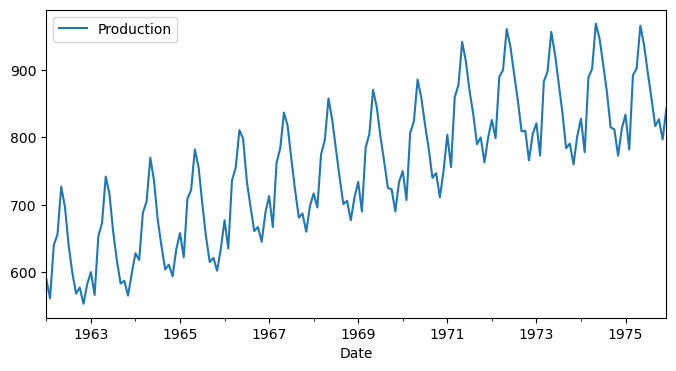

In [104]:
data.plot(figsize=(8,4))

In [105]:
len(data)

168

In [106]:
train=data.iloc[:158]
test=data.iloc[158:]

In [107]:
test

,Production
Date,
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797


In [127]:
train

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1974-10-01,812
1974-11-01,773
1974-12-01,813


SCALE DOWN-Normalise

In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

scaled_train=scaler.fit_transform(train)
scaled_test=scaler.fit_transform(test)

In [109]:
scaled_train[-12:]

array([[0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ],
       [0.67548077],
       [0.55048077]])

In [110]:
scaled_test

array([[0.56213018],
       [0.62721893],
       [1.        ],
       [0.82840237],
       [0.58579882],
       [0.36094675],
       [0.1183432 ],
       [0.17751479],
       [0.        ],
       [0.27218935]])

In [111]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [112]:
n_input=3
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

#### Example

scaled_train:This is likely your training data that has been preprocessed or scaled for training purposses.it typically contains timeseries or sequential data.

scaled_test:target data lengthen_input:This parameter specifies the length of the sequences that the generator will generate for training.

n_input likely repressents the no of time steps to be used as input to predict the next time step

For instance,if n_input is set to 10,the geenrator will create sequence of length 10

batch_size:n of batches

In [113]:
x,y=generator[1]

print(f'Given the array:{x.flatten()}')
print(f'predict this y:{y}')

Given the array:[0.01923077 0.20913462 0.24759615]
predict this y:[[0.41826923]]


In [114]:
x.shape    # 1 in the first is batch_size

(1, 3, 1)

In [128]:
n_inputs=12
n_features=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_inputs,batch_size=1)

In [129]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [130]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_inputs,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

C:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


The LSTM is a type of recurrent neural network layer(RNN)

designed to process and learn from sequential data

The LSTM layer process the input sequence one step at a time

maintaining an internal state that capture information from

previous time steps.

100 Specifies the number of neurons or units in the LSTM

layer.Each unit represents a memory cell that store

information across time steps

input_shape=(n_inputs,n_features)--Defines the shape of the

input data expected by the LSTM layer

n_inputs- specifies the no of time steps in the input sequence.Each time step represent one observation or unit of time in sequential


In [135]:
model.fit(generator,epochs=50,batch_size=1)

Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0025
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023
Epoch 12/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019
Epoch 13/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024
Epoch 14/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019
Epoch 15/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

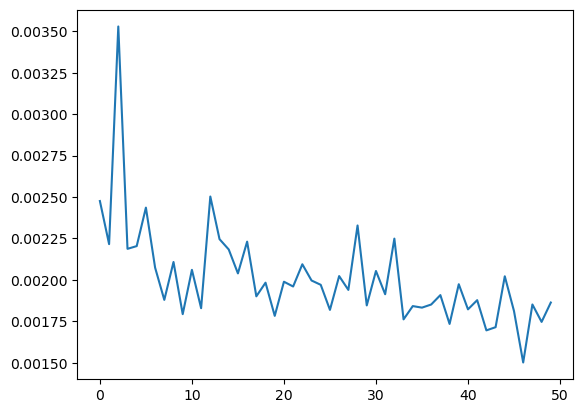

In [136]:
loss_per_epoch=model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [137]:
last_train_batch=scaled_train[-12:]

scaled_train[-12:]:This slice operation extracts the last 12 elements from the scaled_train array or list.

print(last_train_batch):This prints the extracted batch to verify its contents

In [138]:
last_train_batch.shape

(12, 1)

In [139]:
last_train_batch

array([[0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ],
       [0.67548077],
       [0.55048077]])

In [140]:
last_train_batch=last_train_batch.reshape(1,n_inputs,n_features)

In [141]:
last_train_batch.shape

(1, 12, 1)

In [142]:
pred=model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


In [143]:
pred #we will get production of 13th.

array([[0.77343655]], dtype=float32)